In [1]:
from StochasticProcesses import *
import scipy.stats as sp

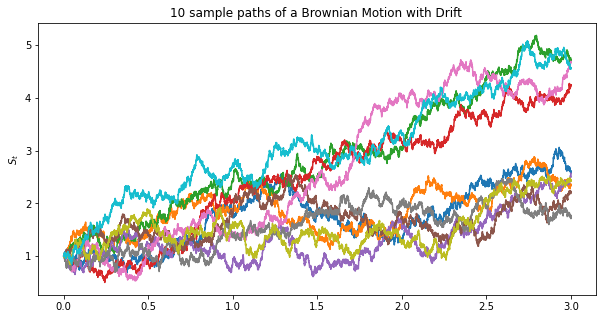

In [2]:
bm = BrownianMotionWithDrift(T=3, x0=1, mu=0.5, sigma=0.8)
bm.plotPaths(nPaths=10)

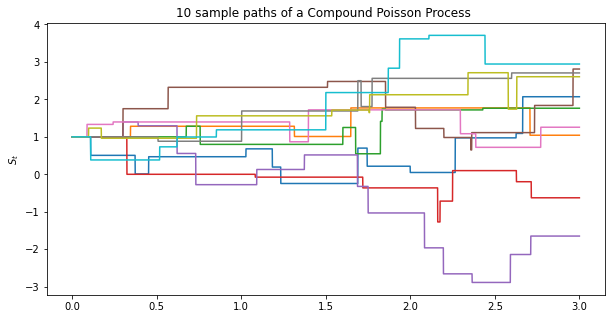

In [3]:
cp = CompoundPoissonProcess(lam=3, T=3, x0=1, jumpSizeRV=sp.uniform(loc=-1, scale=2))
cp.plotPaths(nPaths=10)

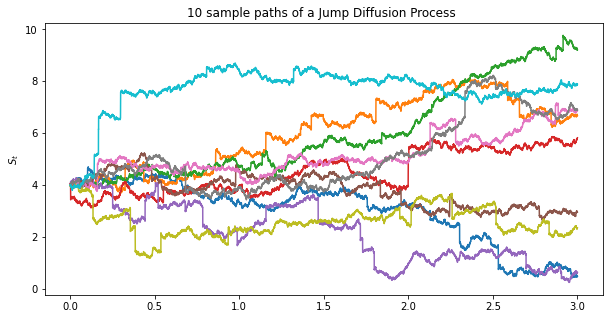

In [4]:
jd = JumpDiffusionProcess(bm, cp, x0=2)
jd.plotPaths(nPaths=10)

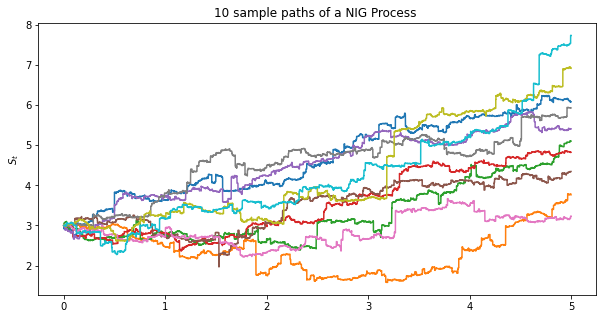

In [5]:
nig = NIGProcess(T=5, x0=3, nSteps=20000, theta=0.3, sigma=0.5, kappa=0.2)
nig.plotPaths(nPaths=10)

In [6]:
from OptionPricing import AssetModel

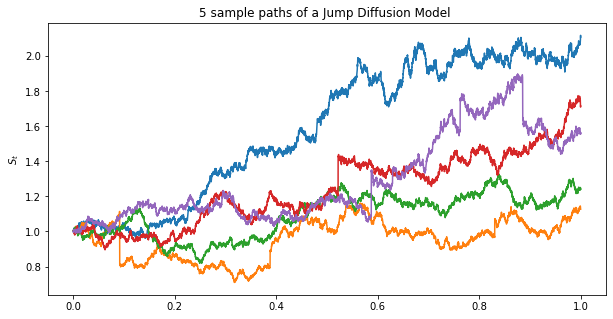

In [7]:
r = 0.3
sig = 0.3
lam = 3
jumpScale = 0.15
jumpRV = sp.norm(scale=jumpScale)
expMomJump = np.exp(jumpScale ** 2 / 2)
drift = r - sig **2 / 2 + lam * (1 - expMomJump)
jd = JumpDiffusionProcess(BrownianMotionWithDrift(mu=drift, sigma=sig), CompoundPoissonProcess(lam=lam, jumpSizeRV=jumpRV))
asset = AssetModel(jd, r=0.)
asset.plotPaths(nPaths=5)

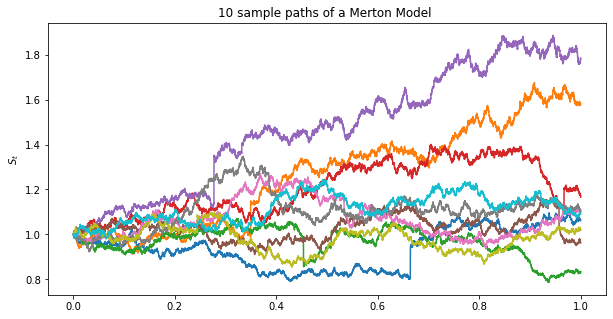

In [12]:
from OptionPricing import *
merton = MertonModel(r=0.1)
merton.plotPaths(nPaths=10)

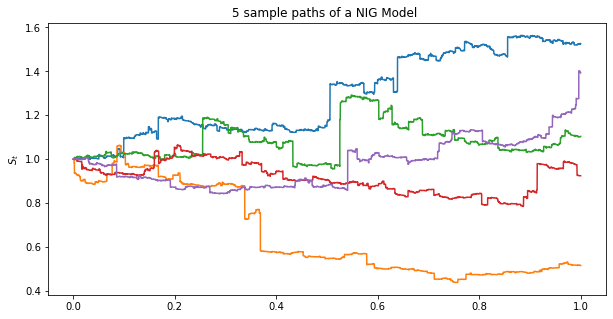

In [9]:
nig = NIGModel()
nig.plotPaths(nPaths=5)

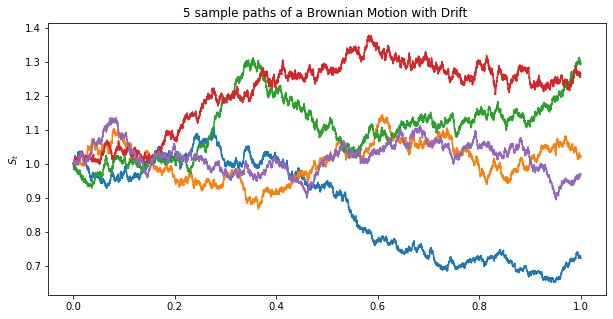

In [13]:
bs = BlackScholesModel()
bs.plotPaths(nPaths=5)

In [10]:
n = 1e6
print('Martingale Check (Difference to expected value)')
print('Merton: {:.6f}'.format(merton.generateValues(nVals=int(n)).mean() - np.exp(merton.r)))
print('NIG: {:.6f}'.format(nig.generateValues(nVals=int(n)).mean() - np.exp(nig.r)))

Martingale Check (Difference to expected value)
Merton: -0.000223
NIG: 0.000173


In [11]:
k = 1
call = lambda x: np.maximum(x - k, 0)
nig.OptionPriceMC(call)

0.14271775453976548